In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-model/Churn_Modelling.csv
/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv


In [65]:
df = pd.read_csv('/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv')

In [66]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [68]:
df.shape

(10000, 14)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [70]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [72]:
# dropping irrelevent features

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [73]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Encoding Categorical Data

In [74]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [75]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [76]:
df = pd.get_dummies(df,drop_first=True)

In [77]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [78]:
df['Geography_Germany'].replace({False:0,True:1},inplace=True)
df['Geography_Spain'].replace({False:0,True:1},inplace=True)
df['Gender_Male'].replace({False:0,True:1},inplace=True)

<ipython-input-78-cbac635214e3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Geography_Germany'].replace({False:0,True:1},inplace=True)
<ipython-input-78-cbac635214e3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography_Germany'].replace({False:0,True:1},inplace=True)
<ipython-inp

In [79]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [81]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [82]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

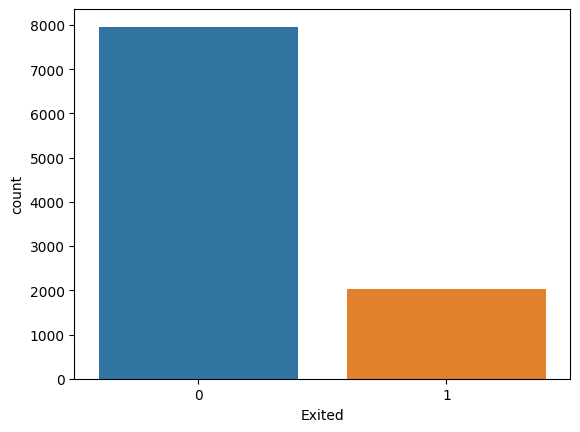

In [83]:
sns.countplot(data=df,x=df['Exited'])

In [84]:
X = df.drop(['Exited'],axis=1)

y = df['Exited']

In [85]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [86]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Handling Imbalanced Data with SMOTE (Synthetic Minority Oversampling TEchnique)

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
X_new, y_new = SMOTE().fit_resample(X,y)

In [89]:
X.shape, y.shape, X_new.shape, y_new.shape

((10000, 11), (10000,), (15926, 11), (15926,))

In [90]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [91]:
y_new.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [92]:
# splitting the data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)

In [93]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12740, 11), (3186, 11), (12740,), (3186,))

In [94]:
y_train.value_counts()

Exited
1    6410
0    6330
Name: count, dtype: int64

In [95]:
y_test.value_counts()

Exited
0    1633
1    1553
Name: count, dtype: int64

In [96]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
X_train

array([[ 1.00759207,  0.40584495,  1.17034243, ..., -0.56997825,
        -0.46150489, -0.84934622],
       [ 1.10633821,  0.10431911, -1.39475227, ..., -0.56997825,
        -0.46150489,  1.17737617],
       [-0.42971275,  1.81296557, -1.39475227, ..., -0.56997825,
        -0.46150489, -0.84934622],
       ...,
       [ 0.20665122,  0.20482772,  1.17034243, ..., -0.56997825,
        -0.46150489,  1.17737617],
       [-0.91247163, -0.5992412 ,  0.07101613, ...,  1.7544529 ,
        -0.46150489, -0.84934622],
       [ 0.53580499,  1.00889664, -1.39475227, ...,  1.7544529 ,
        -0.46150489,  1.17737617]])

### 1. Logistic Regression Model

In [98]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

LogisticRegression()

In [99]:
y_pred_lr = lr_model.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_test,y_pred_lr)

0.7893910860012555

In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [103]:
as_lr = accuracy_score(y_test,y_pred_lr)
ps_lr = precision_score(y_test,y_pred_lr)
rs_lr = recall_score(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)

In [104]:
print('Accuracy Score using Logistic Regression:',as_lr)

print('Precision Score using Logistic Regression:',ps_lr)

print('Recall Score using Logistic Regression:',rs_lr)

print('F1 Score using Logistic Regression:',f1_lr)


Accuracy Score using Logistic Regression: 0.7893910860012555
Precision Score using Logistic Regression: 0.7752808988764045
Recall Score using Logistic Regression: 0.7997424339987121
F1 Score using Logistic Regression: 0.7873217115689382


### 2. Support Vector Classifier (SVC) Model

In [105]:
from sklearn import svm

In [106]:
svc_model = svm.SVC()
svc_model.fit(X_train, y_train)

SVC()

In [107]:
y_pred_svc = svc_model.predict(X_test)

In [108]:
as_svc = accuracy_score(y_test,y_pred_svc)
ps_svc = precision_score(y_test,y_pred_svc)
rs_svc = recall_score(y_test,y_pred_svc)
f1_svc = f1_score(y_test,y_pred_svc)

In [109]:
print('Accuracy Score using SVC:',as_svc)

print('Precision Score using SVC:',ps_svc)

print('Recall Score using SVC:',rs_svc)

print('F1 Score using SVC:',f1_svc)

Accuracy Score using SVC: 0.8449466415568111
Precision Score using SVC: 0.8328095537397863
Recall Score using SVC: 0.8531873792659369
F1 Score using SVC: 0.8428753180661577


### 3. KNeighbors Classifier Model

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [112]:
as_knn = accuracy_score(y_test,y_pred_knn)
ps_knn = precision_score(y_test,y_pred_knn)
rs_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)

print('Accuracy Score using KNN:',as_knn)

print('Precision Score using KNN:',ps_knn)

print('Recall Score using KNN:',rs_knn)

print('F1 Score using KNN:',f1_knn)


Accuracy Score using KNN: 0.8166980539861896
Precision Score using KNN: 0.7966932026944274
Recall Score using KNN: 0.8377334191886671
F1 Score using KNN: 0.8166980539861897


### 4. Decision Tree Classifier Model

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
model_tree = DecisionTreeClassifier()

model_tree.fit(X_train,y_train)

y_pred_tree = model_tree.predict(X_test)

In [115]:
as_tree = accuracy_score(y_test,y_pred_tree)
ps_tree = precision_score(y_test,y_pred_tree)
rs_tree = recall_score(y_test,y_pred_tree)
f1_tree = f1_score(y_test,y_pred_tree)

print('Accuracy Score using Decision Tree:',as_tree)

print('Precision Score using Decision Tree:',ps_tree)

print('Recall Score using Decision Tree:',rs_tree)

print('F1 Score using Decision Tree:',f1_tree)


Accuracy Score using Decision Tree: 0.7903327055869429
Precision Score using Decision Tree: 0.7743335399876008
Recall Score using Decision Tree: 0.8042498390212492
F1 Score using Decision Tree: 0.7890082122552117


### 5. Random Forest Classifier Model

In [116]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [117]:
as_rf = accuracy_score(y_test,y_pred_rf)
ps_rf = precision_score(y_test,y_pred_rf)
rs_rf = recall_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)

print('Accuracy Score using Random Forest:',as_rf)

print('Precision Score using Random Forest:',ps_rf)

print('Recall Score using Random Forest:',rs_rf)

print('F1 Score using Random Forest:',f1_rf)

Accuracy Score using Random Forest: 0.8603264281230383
Precision Score using Random Forest: 0.8497474747474747
Recall Score using Random Forest: 0.866709594333548
F1 Score using Random Forest: 0.8581447242588459


### 6. Gradient Boosting Classifier Model

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()

model_gb.fit(X_train,y_train)

y_pred_gb = model_gb.predict(X_test)

In [119]:
as_gb = accuracy_score(y_test,y_pred_gb)
ps_gb = precision_score(y_test,y_pred_gb)
rs_gb = recall_score(y_test,y_pred_gb)
f1_gb = f1_score(y_test,y_pred_gb)

print('Accuracy Score using Gradient Boosting:',as_gb)

print('Precision Score using Gradient Boosting:',ps_gb)

print('Recall Score using Gradient Boosting:',rs_gb)

print('F1 Score using Gradient Boosting:',f1_gb)

Accuracy Score using Gradient Boosting: 0.8430634023854363
Precision Score using Gradient Boosting: 0.836852207293666
Recall Score using Gradient Boosting: 0.8422408242112042
F1 Score using Gradient Boosting: 0.8395378690629013


### 7. XGBoost Classifier Model

In [120]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

model_xgb.fit(X_train,y_train)

y_pred_xgb = model_xgb.predict(X_test)

In [121]:
as_xgb = accuracy_score(y_test,y_pred_xgb)
ps_xgb = precision_score(y_test,y_pred_xgb)
rs_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb = f1_score(y_test,y_pred_xgb)

print('Accuracy Score using XGBoost:',as_xgb)

print('Precision Score using XGBoost:',ps_xgb)

print('Recall Score using XGBoost:',rs_xgb)

print('F1 Score using XGBoost:',f1_xgb)

Accuracy Score using XGBoost: 0.8666038920276209
Precision Score using XGBoost: 0.849009900990099
Recall Score using XGBoost: 0.8834513844172569
F1 Score using XGBoost: 0.8658882928368571


### Visualise all the Models

In [122]:
model_df = pd.DataFrame(
    {'Models':
         ['Logistic Regression','Support Vector Classifier',
          'KNN', 'Decision Tree','Random Forest',
          'Gradient Boosting','XGBoost'],
     'Accuracy Score':
         [as_lr,as_svc,
          as_knn,as_tree,as_rf,
          as_gb, as_xgb],
     'Precision Score':
         [ps_lr,ps_svc,
          ps_knn,ps_tree,ps_rf,
          ps_gb, ps_xgb],
     'Recall Score':
         [rs_lr,rs_svc,
          rs_knn,rs_tree,rs_rf,
          rs_gb, rs_xgb],
     'F1 Score':
         [f1_lr,f1_svc,
          f1_knn,f1_tree,f1_rf,
          f1_gb, f1_xgb],
     
    })
                       
    

**HyperParameter Tuning**

In [123]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

}
grid_lr = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)
print("Logistic Regression best:", grid_lr.best_params_, "Accuracy:", grid_lr.score(X_test, y_test))

# Support Vector Classifier
svc_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_svc = GridSearchCV(svm.SVC(), svc_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)
print("SVC best:", grid_svc.best_params_, "Accuracy:", grid_svc.score(X_test, y_test))

# KNN
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
print("KNN best:", grid_knn.best_params_, "Accuracy:", grid_knn.score(X_test, y_test))

# Decision Tree
tree_params = {
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,20],
    'max_features':['auto','sqrt','log2'],
    'min_samples_split': [2, 5]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=0), tree_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_tree.fit(X_train, y_train)
print("Decision Tree best:", grid_tree.best_params_, "Accuracy:", grid_tree.score(X_test, y_test))

# Random Forest
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=0), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Random Forest best:", grid_rf.best_params_, "Accuracy:", grid_rf.score(X_test, y_test))

# Gradient Boosting
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 6]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train, y_train)
print("Gradient Boosting best:", grid_gb.best_params_, "Accuracy:", grid_gb.score(X_test, y_test))

# XGBoost
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 6]}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print("XGBoost best:", grid_xgb.best_params_, "Accuracy:", grid_xgb.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Logistic Regression best: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} Accuracy: 0.7871939736346516
SVC best: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} Accuracy: 0.842435655994978
KNN best: {'n_neighbors': 7, 'weights': 'distance'} Accuracy: 0.8330194601381042


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Decision Tree best: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'} Accuracy: 0.8123038292529818
Random Forest best: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200} Accuracy: 0.8640929064657878
Gradient Boosting best: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200} Accuracy: 0.8637790332705587
XGBoost best: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200} Accuracy: 0.8612680477087257


In [124]:
model_df

,Models,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.789391,0.775281,0.799742,0.787322
1,Support Vector Classifier,0.844947,0.832810,0.853187,0.842875
2,KNN,0.816698,0.796693,0.837733,0.816698
3,Decision Tree,0.790333,0.774334,0.804250,0.789008
4,Random Forest,0.860326,0.849747,0.866710,0.858145
5,Gradient Boosting,0.843063,0.836852,0.842241,0.839538
6,XGBoost,0.866604,0.849010,0.883451,0.865888


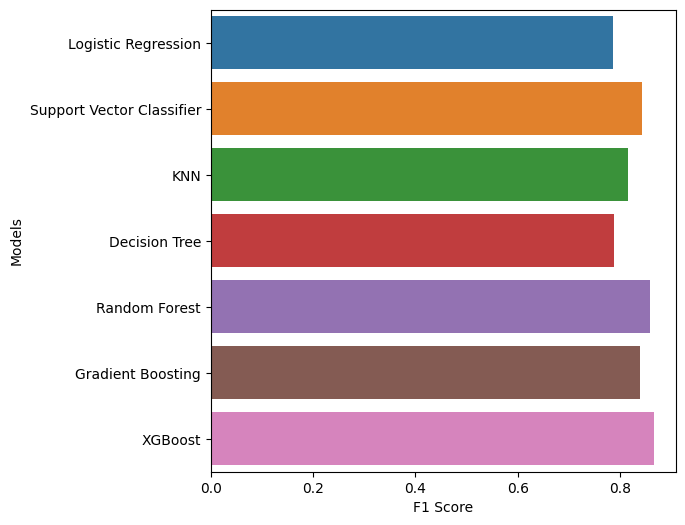

In [125]:
# Visualising F1 Score for each model

import matplotlib.pyplot as plt 

plt.figure(figsize=(6,6))
model_plot = sns.barplot(data=model_df,y=model_df['Models'],x=model_df['F1 Score'])

#### from the above Random Forest and XGBoost are 1st and 2nd best models with default parameters

#### now saved the Random Forest Modle for future use

In [126]:
import joblib

In [127]:
joblib.dump(model_rf,'churn_predict_model')

['churn_predict_model']